In [ ]:
# scVI with py

In [1]:
import scanpy as sc
import scvi
import seaborn as sns
# import torch
import pandas as pd
import numpy as np
import pymde
import scib
from scib_metrics.benchmark import Benchmarker
scvi.settings.seed = 0

/home/suresh/miniforge3/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/suresh/miniforge3/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/suresh/miniforge3/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/suresh/miniforge3/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/suresh/miniforge3/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing CSRDataset from `anndata.experimen

In [2]:
print("Last run with scvi-tools version:", scvi.__version__)

Last run with scvi-tools version: 1.2.0


In [3]:
# read file
adata = sc.read_h5ad("chicken_scANVI_new2.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 50547 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'species', 'dataset', 'consensus_type', 'integrated_snn_res.1', 'seurat_clusters', '_scvi_batch', '_scvi_labels'
    var: 'vf_vst_counts_mean', 'vf_vst_counts_variance', 'vf_vst_counts_variance.expected', 'vf_vst_counts_variance.standardized', 'vf_vst_counts_variable', 'vf_vst_counts_rank', 'var.features', 'var.features.rank', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'consensus_type_colors', 'hvg'
    obsm: 'X_scANVI', 'X_scANVI_MDE'
    layers: 'counts'

In [5]:
# PCA from concatentating counts
mat0 = np.genfromtxt('chicken_raw_embeddings_new2.csv', delimiter = ',')

# other batch-correction methods
mat1 = np.genfromtxt('chicken_scVI_embeddings_new2.csv', delimiter = ',')
mat2 = np.genfromtxt('chicken_ssSTACAS_embeddings_new2.csv', delimiter = ',')
mat3 = np.genfromtxt('chicken_scanorama_pca.csv', delimiter = ',')

mat4 = np.genfromtxt('chicken_RPCA_embeddings_new2.csv', delimiter = ',')
mat5 = np.genfromtxt('chicken_SCT_embeddings_new2.csv', delimiter = ',')

In [7]:
adata.obsm['X_pca'] = mat0
adata.obsm['X_scVI'] = mat1
adata.obsm['X_ssSTACAS'] = mat2
adata.obsm['X_scanorama'] = mat3

adata.obsm['X_RPCA'] = mat4
adata.obsm['X_SCTransform'] = mat5

In [8]:
adata

AnnData object with n_obs × n_vars = 50547 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'species', 'dataset', 'consensus_type', 'integrated_snn_res.1', 'seurat_clusters', '_scvi_batch', '_scvi_labels'
    var: 'vf_vst_counts_mean', 'vf_vst_counts_variance', 'vf_vst_counts_variance.expected', 'vf_vst_counts_variance.standardized', 'vf_vst_counts_variable', 'vf_vst_counts_rank', 'var.features', 'var.features.rank', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'consensus_type_colors', 'hvg'
    obsm: 'X_scANVI', 'X_scANVI_MDE', 'X_pca', 'X_scVI', 'X_ssSTACAS', 'X_scanorama', 'X_RPCA', 'X_SCTransform'
    layers: 'counts'

In [9]:
bm = Benchmarker(
    adata,
    batch_key="dataset",
    label_key="consensus_type",
    embedding_obsm_keys=["X_pca", "X_ssSTACAS", "X_scVI", "X_scANVI", "X_scanorama", "X_RPCA", "X_SCTransform"],
    n_jobs=-1,
)
bm.benchmark()

/home/suresh/miniforge3/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)
Metrics:   0%|        | 0/10 [00:00<?, ?it/s, Bio conservation: isolated_labels]
Metrics:  10%| | 1/10 [01:05<09:53, 66.00s/it, Bio conservation: isolated_labels
Metrics:  10%| | 1/10 [01:06<09:53, 66.00s/it, Bio conservation: nmi_ari_cluster/home/suresh/miniforge3/lib/python3.10/site-packages/jax/_src/linear_util.py:193: DeprecationWarning: Passing arguments 'a', 'a_min' or 'a_max' to jax.numpy.clip is deprecated. Please use 'arr', 'min' or 'max' respectively instead.
  ans = self.f(*args, **dict(self.params, **kwargs))

Metrics:  20%|▏| 2/10 [01:14<04:16, 32.01s/it, Bio conservation: nmi_ari_cluster
Metrics:  20%|▏| 2/10 [01:14<04:16, 32.01s/it

INFO     mesoderm consists of a single batch or is too small. Skip.                                                


/home/suresh/miniforge3/lib/python3.10/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/home/suresh/miniforge3/lib/python3.10/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/home/suresh/miniforge3/lib/python3.10/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)

Metrics:  70%|▋| 7/10 [07:39<05:28, 109.62s/it, Batch correction: kbet_per_label
Metrics:  70%|▋| 7/10 [07:39<05:28, 109.62s/it, Batch correction: graph_connecti/home/suresh/miniforge3/lib/python3.10/site-packages/scib_metrics/_graph_connectivity.py:30

INFO     mesoderm consists of a single batch or is too small. Skip.                                                


/home/suresh/miniforge3/lib/python3.10/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/home/suresh/miniforge3/lib/python3.10/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/home/suresh/miniforge3/lib/python3.10/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)

Metrics:  70%|▋| 7/10 [04:36<04:03, 81.04s/it, Batch correction: kbet_per_label]
Metrics:  70%|▋| 7/10 [04:36<04:03, 81.04s/it, Batch correction: graph_connectiv/home/suresh/miniforge3/lib/python3.10/site-packages/scib_metrics/_graph_connectivity.py:30

INFO     mesoderm consists of a single batch or is too small. Skip.                                                


/home/suresh/miniforge3/lib/python3.10/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/home/suresh/miniforge3/lib/python3.10/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/home/suresh/miniforge3/lib/python3.10/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)

Metrics:  70%|▋| 7/10 [05:13<04:37, 92.58s/it, Batch correction: kbet_per_label]
Metrics:  70%|▋| 7/10 [05:13<04:37, 92.58s/it, Batch correction: graph_connectiv/home/suresh/miniforge3/lib/python3.10/site-packages/scib_metrics/_graph_connectivity.py:30

INFO     mesoderm consists of a single batch or is too small. Skip.                                                


/home/suresh/miniforge3/lib/python3.10/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)

Metrics:  70%|▋| 7/10 [01:44<01:13, 24.55s/it, Batch correction: kbet_per_label]
Metrics:  70%|▋| 7/10 [01:44<01:13, 24.55s/it, Batch correction: graph_connectiv/home/suresh/miniforge3/lib/python3.10/site-packages/scib_metrics/_graph_connectivity.py:30: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(comps)

Metrics:  80%|▊| 8/10 [01:45<00:33, 16.78s/it, Batch correction: graph_connectiv
Metrics:   0%|                                           | 0/10 [00:00<?, ?it/s]
                                                                                
Metrics:   0%|        | 0/10 [00:00<?, ?it/s, Bio conservation: isolated_labels]
Metrics

INFO     mesoderm consists of a single batch or is too small. Skip.                                                


/home/suresh/miniforge3/lib/python3.10/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/home/suresh/miniforge3/lib/python3.10/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/home/suresh/miniforge3/lib/python3.10/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)

Metrics:  70%|▋| 7/10 [07:11<03:25, 68.59s/it, Batch correction: kbet_per_label]
Metrics:  70%|▋| 7/10 [07:11<03:25, 68.59s/it, Batch correction: graph_connectiv/home/suresh/miniforge3/lib/python3.10/site-packages/scib_metrics/_graph_connectivity.py:30

INFO     mesoderm consists of a single batch or is too small. Skip.                                                


/home/suresh/miniforge3/lib/python3.10/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/home/suresh/miniforge3/lib/python3.10/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/home/suresh/miniforge3/lib/python3.10/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)

Metrics:  70%|▋| 7/10 [05:48<05:14, 104.86s/it, Batch correction: kbet_per_label
Metrics:  70%|▋| 7/10 [05:48<05:14, 104.86s/it, Batch correction: graph_connecti/home/suresh/miniforge3/lib/python3.10/site-packages/scib_metrics/_graph_connectivity.py:30

INFO     mesoderm consists of a single batch or is too small. Skip.                                                


/home/suresh/miniforge3/lib/python3.10/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/home/suresh/miniforge3/lib/python3.10/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/home/suresh/miniforge3/lib/python3.10/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)

Metrics:  70%|▋| 7/10 [02:29<01:57, 39.25s/it, Batch correction: kbet_per_label]
Metrics:  70%|▋| 7/10 [02:29<01:57, 39.25s/it, Batch correction: graph_connectiv/home/suresh/miniforge3/lib/python3.10/site-packages/scib_metrics/_graph_connectivity.py:30

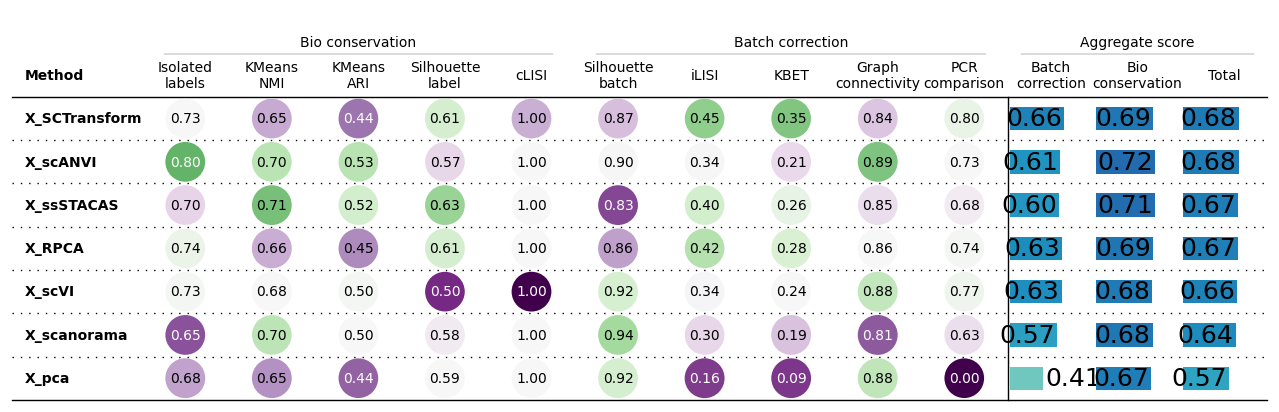

In [10]:
bm.plot_results_table(min_max_scale=False)

In [12]:
from rich import print

df = bm.get_results(min_max_scale=False)
print(df)

Isolated labels        KMeans NMI        KMeans ARI  \
Embedding                                                             
X_pca                  0.679231          0.648869          0.438951   
X_ssSTACAS             0.704645          0.710207          0.521292   
X_scVI                 0.731676          0.678071          0.502753   
X_scANVI               0.798523          0.697937           0.53085   
X_scanorama            0.645999          0.697266          0.500118   
X_RPCA                 0.737661          0.655671          0.452399   
X_SCTransform          0.729135          0.654322          0.443983   
Metric Type    Bio conservation  Bio conservation  Bio conservation   

               Silhouette label             cLISI  Silhouette batch  \
Embedding                                                             
X_pca                  0.585368               1.0          0.920792   
X_ssSTACAS             0.633033               1.0          0.826244   
X_scVI                 0.497567               1.0          0.919884   
X_scANVI               0.565157               1.0          0.899083   
X_scanorama            0.577575               1.0          0.939982   
X_RPCA                 0.608826               1.0          0.856723   
X_SCTransform          0.609214               1.0           0.86955   
Metric Type    Bio conservation  Bio conservation  Batch correction   

                          iLISI              KBET Graph connectivity  \
Embedding                                                              
X_pca                  0.162074          0.086736           0.877028   
X_ssSTACAS             0.395557          0.264497           0.848084   
X_scVI                 0.338679          0.243236           0.876067   
X_scANVI               0.342494          0.208029           0.890251   
X_scanorama            0.298767          0.186611           0.814937   
X_RPCA                 0.424833          0.284361           0.857617   
X_SCTransform          0.453501          0.345848           0.840645   
Metric Type    Batch correction  Batch correction   Batch correction   

                 PCR comparison Batch correction Bio conservation  \
Embedding                                                           
X_pca                       0.0         0.409326         0.670484   
X_ssSTACAS             0.683469          0.60357         0.713836   
X_scVI                 0.771788         0.629931         0.682013   
X_scANVI               0.731154         0.614202         0.718493   
X_scanorama            0.634064         0.574872         0.684191   
X_RPCA                 0.743264         0.633359         0.690911   
X_SCTransform          0.796688         0.661246         0.687331   
Metric Type    Batch correction  Aggregate score  Aggregate score   

                         Total  
Embedding                       
X_pca                 0.566021  
X_ssSTACAS            0.669729  
X_scVI                 0.66118  
X_scANVI              0.676777  
X_scanorama           0.640464  
X_RPCA                0.667891  
X_SCTransform         0.676897  
Metric Type    Aggregate score

In [13]:
# save
pd.DataFrame(df).to_csv('chicken_scib_metrics.csv')